## CNN                                   

A CNN works like this:

1. **Convolution** → you apply **filters** to the image to extract patterns (edges, curves, textures).
2. **Stride** → this is the **step** at which the filter passes: stride=1 goes pixel by pixel, stride=2 skips one.
3. **Pooling** → you **reduce the dimension** by choosing key values ​​(e.g., maximum).
4. **Stacking → multiple layers** = from **simple patterns to complex** shapes.
5. **Flatten + Dense** → you **transform the features into a vector** and pass it to fully connected neurons for final classification.

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [12]:
# Create the model 
model = Sequential()

In [13]:
# First convolution layer
# - 16 filters (kernels) of size 2x2
# - stride (step) = 1 → the filter moves pixel by pixel
# - ReLU activation → transforms negative values ​​to 0
# - input_shape = (128, 128, 3) → 128x128 images in RGB
model.add(Conv2D(16, (2, 2), strides=(1, 1),
activation='relu', input_shape=(128, 128, 3)))

In [14]:
# First MaxPooling Layer
# - reduces the dimension by taking the maximum value in each 2x2 block
# - stride=2 → halves the spatial dimension
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

In [15]:
# Second Convolution Layer
# - 32 2x2 filters, with ReLU
# - increases the ability to recognize more complex features
model.add(Conv2D(32, (2, 2), strides=(1, 1), activation='relu'))

In [16]:
# Second MaxPooling Layer
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

In [17]:
# Flatten
# - transforms the 2D feature map in a 1D vector
# - used to connect the convolutional part to the fully connected part
model.add(Flatten())

In [18]:
# Fully Connected Layer (dense)
# - 100 neurons with ReLU
# - combines the extracted features to learn more abstract relationships
model.add(Dense(100, activation='relu'))

In [19]:
# 7Output Layer
# - 10 neurons with Softmax → probability distribution across the 10 classes
model.add(Dense(10, activation='softmax'))

In [20]:
# Model Compilation
# - Adam optimizer → optimized gradient descent
# - categorical_crossentropy loss → for multi-class classification
# - metrics: accuracy
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [21]:
# Model Summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 127, 127, 16)   │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 32)     │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 30752)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │     3,075,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,078,598 (11.74 MB)

 Trainable params: 3,078,598 (11.74 MB)

 Non-trainable params: 0 (0.00 B)

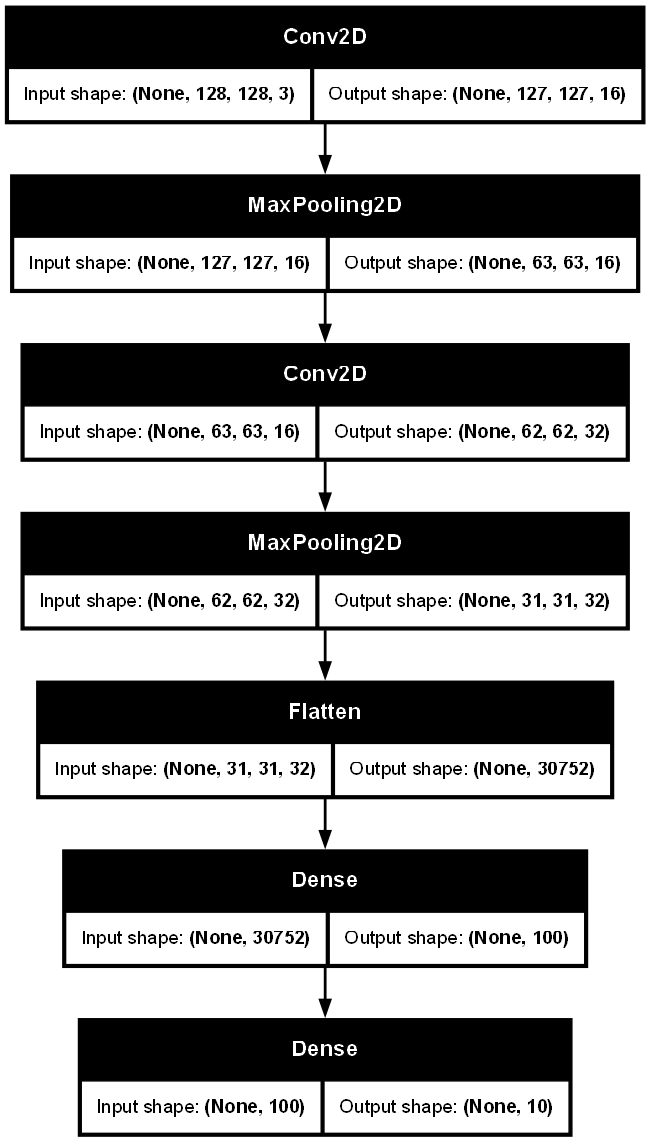

In [27]:
keras.utils.plot_model(model, "CNN.png", show_shapes=True, dpi=100)